# 18 Clothing Categories

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
torch.cuda.set_device(0)

## Looking at the data

Classification of Cloth Categories

Large-scale Fashion Recognition and Retrieval (DeepFashion) Dataset 
Category and Attribute Prediction Benchmark

By Multimedia Lab, The Chinese University of Hong Kong


For more information about the dataset, visit the project website:

  http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


  @inproceedings{liu2016deepfashion,
 	author = {Ziwei Liu, Ping Luo, Shi Qiu, Xiaogang Wang, and Xiaoou Tang},
 	title = {DeepFashion: Powering Robust Clothes Recognition and Retrieval with Rich Annotations},
 	booktitle = {Proceedings of IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
 	month = June,
 	year = {2016} 
  }

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Pathes


In [0]:
root_dir = "/content/gdrive/My Drive/Colab/Colab Notebooks/"
path = Path(root_dir + "/dataset/img/")

In [0]:
img_dir_path = path/"img"
len(img_dir_path.ls())

167

In [0]:
fnames = get_image_files(img_dir_path/"Zip-Up_Puffer_Jacket")
fnames[:5]

[PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000002.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000038.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000015.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000003.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000016.jpg')]

Lets clean our csv file. As it is more extened than we need, we have to check what file are in the google disk and save only them to csv.

In [0]:
import pandas as pd
import os
df = pd.read_csv(root_dir + "/dataset/img/train_labels.csv")
csv_path = Path(root_dir + "dataset/img/")

df.head()



,image_name,category_name
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,Blouse


In [0]:
#changed the pathes in file
# df['image_name'] = [Path(csv_path, x) for x in df['image_name']]
#left only existing files
df1 = df[[Path(csv_path/df.loc[x, "image_name"]).exists() for x in range(df.shape[0])]]
print(df1.shape)
df1.to_csv(path/"train_labels_colab2.csv", index=False)


(8332, 2)


In [0]:
tfms = get_transforms(max_rotate=10.0, max_zoom=1.1, 
                       max_lighting=0.2, max_warp=0.2, 
                       p_affine=0.75, p_lighting=0.75, 
                       xtra_tfms=[flip_lr(), crop_pad(size=299), squish(), cutout()])

def get_ex(): return open_image(path/'img_00000056.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) 
     for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


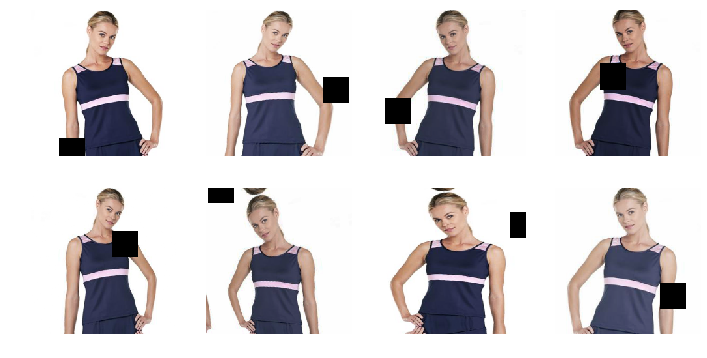

In [0]:
plots_f(2, 4, 12, 6, size=224)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, csv_labels="train_labels_colab2.csv", ds_tfms=tfms, size=224, bs=128)
data.normalize(imagenet_stats)

In [0]:
df = pd.read_csv(path/"train_labels_colab2.csv")
df.category_name.value_counts()

In [0]:
help(ImageDataBunch.from_csv)

Help on method from_csv in module fastai.vision.data:

from_csv(path:Union[pathlib.Path, str], folder:Union[pathlib.Path, str]=None, label_delim:str=None, csv_labels:Union[pathlib.Path, str]='labels.csv', valid_pct:float=0.2, fn_col:int=0, label_col:int=1, suffix:str='', delimiter:str=None, header:Union[int, str, NoneType]='infer', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a csv file in `path/csv_labels`.



In [0]:
data.show_batch(rows=6, figsize=(14,12))

In [0]:
print(data.classes)
len(data.classes),data.c

['Blazer', 'Blouse', 'Bomber', 'Cardigan', 'Culottes', 'Dress', 'Flannel', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee']


(21, 21)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).

We will train for 10 epochs (10 cycles through all our data).

In [0]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 88778148.68it/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


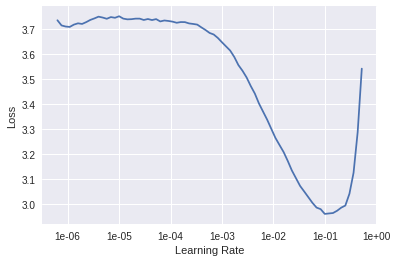

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
1,2.510164,1.605082,0.537215,07:28
2,1.862743,1.375158,0.562425,02:27
3,1.598866,1.325201,0.587635,02:27
4,1.450366,1.197060,0.625450,02:28
5,1.317811,1.173393,0.639256,02:27
6,1.199385,1.160585,0.632053,02:27
7,1.104511,1.132402,0.651260,02:27
8,1.035885,1.110887,0.660864,02:28
9,0.967100,1.097230,0.663265,02:29
10,0.933508,1.098624,0.665066,02:29


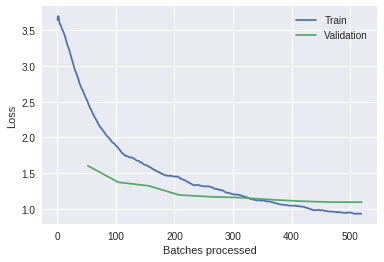

In [0]:
learn.recorder.plot_losses()

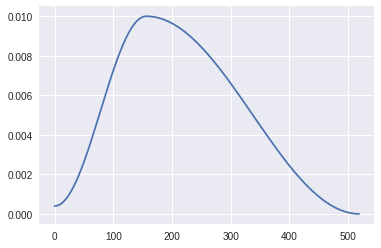

In [0]:
learn.recorder.plot_lr()

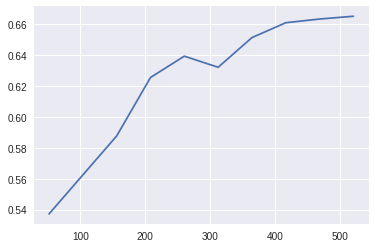

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(path/'stage-1_sz-224')

In [0]:
learn.export()


### Visualize and Analyze

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

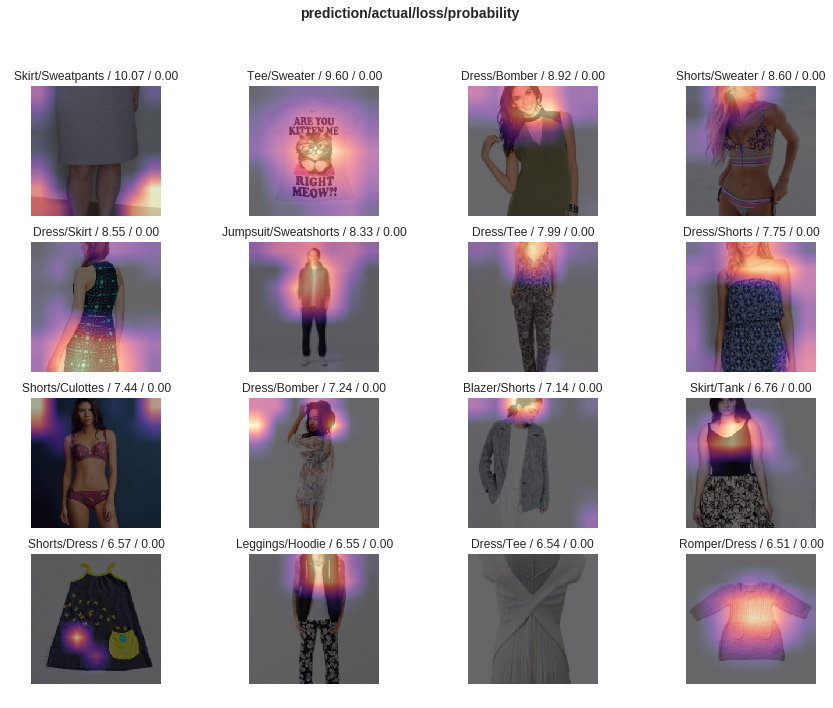

In [0]:
interp.plot_top_losses(16, figsize=(15,11))

In [0]:
interp.most_confused()

In [0]:
# This is for accuracy in top 3 -
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [0]:
# FOR TOP-1 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(1,))

[tensor([66.5066])]

In [0]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(3,))

[tensor([86.8547])]

In [0]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(5,))

[tensor([92.9772])]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.load(path/'stage-1_sz-224')
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


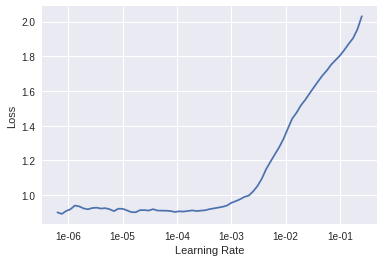

In [0]:
learn.recorder.plot()

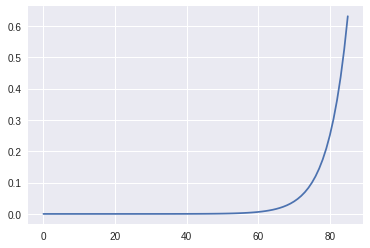

In [0]:
learn.recorder.plot_lr()

In [0]:
?? learn.fit_one_cycle

In [0]:
learn.fit_one_cycle(10, slice(1e-6, lr/10))

epoch,train_loss,valid_loss,accuracy,time
1,0.904278,1.087736,0.670468,02:27
2,0.899681,1.085908,0.674670,02:25
3,0.873254,1.066181,0.678872,02:23
4,0.818824,1.062153,0.682473,02:24
5,0.752088,1.060920,0.686074,02:20
6,0.689668,1.055558,0.687275,02:20
7,0.633200,1.052708,0.694478,02:21
8,0.586687,1.051107,0.694478,02:18
9,0.552233,1.055987,0.693878,02:19
10,0.532421,1.050449,0.693277,02:16


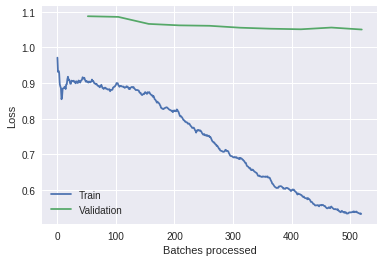

In [0]:
learn.recorder.plot_losses()


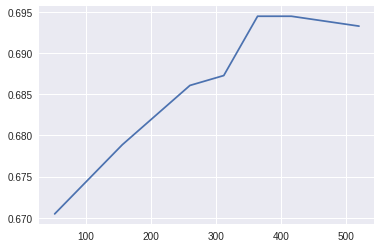

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save(path/'stage-2-34_693sz-224')

In [0]:
learn.export(fname="export_unfreeze_693.pkl")


### Visualize and Analyze

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

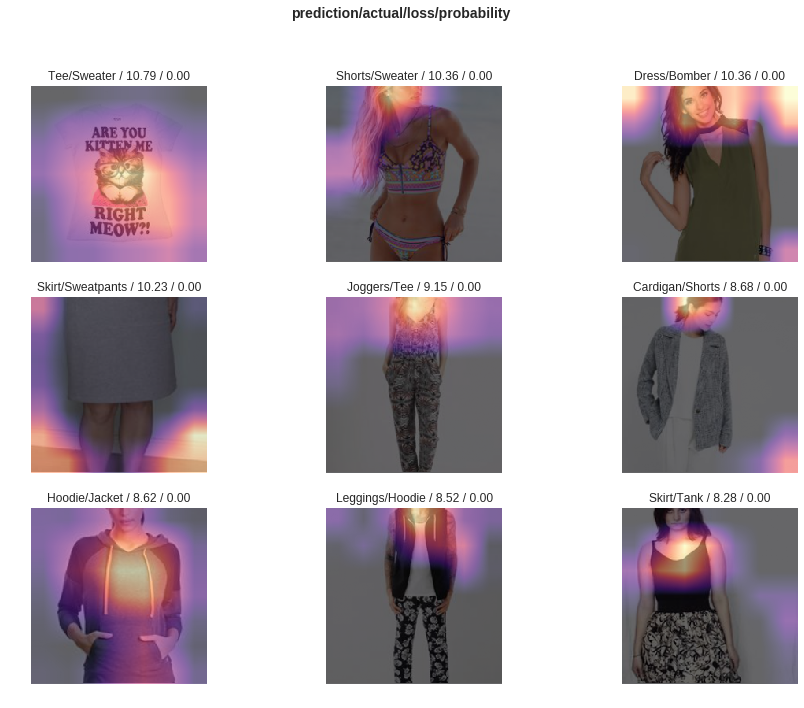

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=5)

[('Bomber', 'Jacket', 19),
 ('Jacket', 'Bomber', 16),
 ('Skirt', 'Dress', 16),
 ('Jacket', 'Blazer', 15),
 ('Shorts', 'Skirt', 15),
 ('Tank', 'Tee', 15),
 ('Sweatpants', 'Joggers', 13),
 ('Blazer', 'Jacket', 12),
 ('Joggers', 'Sweatpants', 12),
 ('Romper', 'Dress', 12),
 ('Tee', 'Dress', 12),
 ('Sweater', 'Tee', 11),
 ('Tee', 'Sweater', 11),
 ('Dress', 'Sweater', 8),
 ('Joggers', 'Leggings', 8),
 ('Skirt', 'Shorts', 8),
 ('Tee', 'Tank', 8),
 ('Hoodie', 'Jacket', 7),
 ('Shorts', 'Dress', 7),
 ('Shorts', 'Tee', 7),
 ('Tank', 'Dress', 7),
 ('Blazer', 'Cardigan', 6),
 ('Blouse', 'Tee', 6),
 ('Dress', 'Tee', 6),
 ('Sweater', 'Cardigan', 6),
 ('Sweater', 'Jacket', 6),
 ('Blouse', 'Sweater', 5),
 ('Dress', 'Skirt', 5),
 ('Hoodie', 'Tee', 5),
 ('Leggings', 'Joggers', 5)]

In [0]:
# FOR TOP-1 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(1,))

[tensor([69.3277])]

In [0]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(3,))

[tensor([88.5954])]

In [0]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(5,))

[tensor([93.9376])]